学习{mlr3verse}基础建模工作流。

# 任务（Task）

## 创建任务

In [ ]:
library(mlr3verse)
mlr_tasks

# <DictionaryTask> with 22 stored values
# Keys: ames_housing, bike_sharing, boston_housing, breast_cancer,
#   california_housing, german_credit, ilpd, iris, kc_housing, moneyball,
#   mtcars, optdigits, penguins, penguins_simple, pima, ruspini, sonar,
#   spam, titanic, usarrests, wine, zoo

Loading required package: mlr3



<DictionaryTask> with 22 stored values
Keys: ames_housing, bike_sharing, boston_housing, breast_cancer,
  california_housing, german_credit, ilpd, iris, kc_housing, moneyball,
  mtcars, optdigits, penguins, penguins_simple, pima, ruspini, sonar,
  spam, titanic, usarrests, wine, zoo

In [ ]:
tsk_mtcars <- tsk("mtcars")
tsk_mtcars

# <TaskRegr:mtcars> (32 x 11): Motor Trends
# * Target: mpg
# * Properties: -
# * Features (10):
#   - dbl (10): am, carb, cyl, disp, drat, gear, hp, qsec, vs, wt

<TaskRegr:mtcars> (32 x 11): Motor Trends
* Target: mpg
* Properties: -
* Features (10):
  - dbl (10): am, carb, cyl, disp, drat, gear, hp, qsec, vs, wt

In [ ]:
tsk()

# <DictionaryTask> with 22 stored values
# Keys: ames_housing, bike_sharing, boston_housing, breast_cancer,
#   california_housing, german_credit, ilpd, iris, kc_housing, moneyball,
#   mtcars, optdigits, penguins, penguins_simple, pima, ruspini, sonar,
#   spam, titanic, usarrests, wine, zoo

<DictionaryTask> with 22 stored values
Keys: ames_housing, bike_sharing, boston_housing, breast_cancer,
  california_housing, german_credit, ilpd, iris, kc_housing, moneyball,
  mtcars, optdigits, penguins, penguins_simple, pima, ruspini, sonar,
  spam, titanic, usarrests, wine, zoo

In [6]:
data("mtcars", package = "datasets")
mtcars_subset <- subset(mtcars, select = c("mpg", "cyl", "disp"))
str(mtcars_subset)

# 'data.frame':	32 obs. of  3 variables:
#  $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
#  $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
#  $ disp: num  160 160 108 258 360 ...

'data.frame':	32 obs. of  3 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...


In [8]:
tsk_mtcars <- as_task_regr(mtcars_subset, target = "mpg", id = "cars")

In [ ]:
tsk_mtcars

# <TaskRegr:cars> (32 x 3)
# * Target: mpg
# * Properties: -
# * Features (2):
#   - dbl (2): cyl, disp

<TaskRegr:cars> (32 x 3)
* Target: mpg
* Properties: -
* Features (2):
  - dbl (2): cyl, disp

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



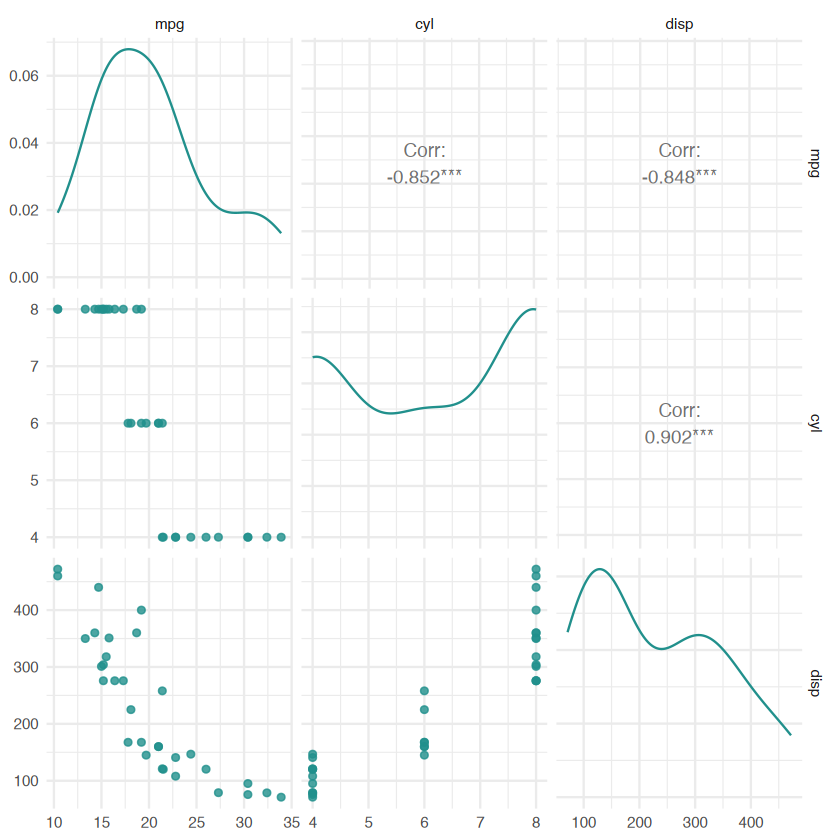

In [10]:
library(mlr3viz)
autoplot(tsk_mtcars, type = "pairs")

## 检索数据

In [ ]:
c(tsk_mtcars$nrow, tsk_mtcars$ncol)

# 32 3

[1] 32  3

In [ ]:
c(Features = tsk_mtcars$feature_names,
  Target = tsk_mtcars$target_names)

# Features1'cyl 'Features2'disp' Target'mpg'

Features1 Features2    Target 
    "cyl"    "disp"     "mpg"

In [ ]:
head(tsk_mtcars$row_ids)

# 123456

[1] 1 2 3 4 5 6

In [15]:
# retrieve all data
tsk_mtcars$data()

mpg,cyl,disp
<dbl>,<dbl>,<dbl>
21.0,6,160.0
21.0,6,160.0
22.8,4,108.0
21.4,6,258.0
18.7,8,360.0
18.1,6,225.0
14.3,8,360.0
24.4,4,146.7
22.8,4,140.8


## 修改任务

In [ ]:
# retrieve data for rows with IDs 1, 5, and 10 and all feature columns
library(tidyverse)
tsk_mtcars$data(rows = c(1, 5, 10), cols = tsk_mtcars$feature_names) %>% print()

# cyl  disp
#    <num> <num>
# 1:     6 160.0
# 2:     8 360.0
# 3:     6 167.6

     cyl  disp
   <num> <num>
1:     6 160.0
2:     8 360.0
3:     6 167.6


In [ ]:
# select the 2nd row of the task by extracting the second row_id:
tsk_mtcars$data(rows = tsk_mtcars$row_ids[2]) %>% print()

# mpg   cyl  disp
#    <num> <num> <num>
# 1:    21     6   160

     mpg   cyl  disp
   <num> <num> <num>
1:    21     6   160


In [ ]:
summary(as.data.table(tsk_mtcars))

# mpg             cyl             disp      
#  Min.   :10.40   Min.   :4.000   Min.   : 71.1  
#  1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8  
#  Median :19.20   Median :6.000   Median :196.3  
#  Mean   :20.09   Mean   :6.188   Mean   :230.7  
#  3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0  
#  Max.   :33.90   Max.   :8.000   Max.   :472.0

      mpg             cyl             disp      
 Min.   :10.40   Min.   :4.000   Min.   : 71.1  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8  
 Median :19.20   Median :6.000   Median :196.3  
 Mean   :20.09   Mean   :6.188   Mean   :230.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0  

In [31]:
tsk_mtcars_small <- tsk("mtcars") # initialize with the full task
tsk_mtcars_small$select("cyl") # keep only one feature
tsk_mtcars_small$filter(2:3) # keep only these rows
tsk_mtcars_small$data() %>% print()

# mpg   cyl
#    <num> <num>
# 1:  21.0     6
# 2:  22.8     4

     mpg   cyl
   <num> <num>
1:  21.0     6
2:  22.8     4


In [ ]:
# the wrong way
tsk_mtcars <- tsk("mtcars")
tsk_mtcars_wrong <- tsk_mtcars
tsk_mtcars_wrong$filter(1:2)
# original data affected
tsk_mtcars$head() %>% print()

# mpg    am  carb   cyl  disp  drat  gear    hp  qsec    vs    wt
#    <num> <num> <num> <num> <num> <num> <num> <num> <num> <num> <num>
# 1:    21     1     4     6   160   3.9     4   110 16.46     0 2.620
# 2:    21     1     4     6   160   3.9     4   110 17.02     0 2.875

     mpg    am  carb   cyl  disp  drat  gear    hp  qsec    vs    wt
   <num> <num> <num> <num> <num> <num> <num> <num> <num> <num> <num>
1:    21     1     4     6   160   3.9     4   110 16.46     0 2.620
2:    21     1     4     6   160   3.9     4   110 17.02     0 2.875


In [ ]:
# the right way
tsk_mtcars <- tsk("mtcars")
tsk_mtcars_right <- tsk_mtcars$clone()
tsk_mtcars_right$filter(1:2)
# original data unaffected
tsk_mtcars$head() %>% print()

# mpg    am  carb   cyl  disp  drat  gear    hp  qsec    vs    wt
#    <num> <num> <num> <num> <num> <num> <num> <num> <num> <num> <num>
# 1:  21.0     1     4     6   160  3.90     4   110 16.46     0 2.620
# 2:  21.0     1     4     6   160  3.90     4   110 17.02     0 2.875
# 3:  22.8     1     1     4   108  3.85     4    93 18.61     1 2.320
# 4:  21.4     0     1     6   258  3.08     3   110 19.44     1 3.215
# 5:  18.7     0     2     8   360  3.15     3   175 17.02     0 3.440
# 6:  18.1     0     1     6   225  2.76     3   105 20.22     1 3.460

     mpg    am  carb   cyl  disp  drat  gear    hp  qsec    vs    wt
   <num> <num> <num> <num> <num> <num> <num> <num> <num> <num> <num>
1:  21.0     1     4     6   160  3.90     4   110 16.46     0 2.620
2:  21.0     1     4     6   160  3.90     4   110 17.02     0 2.875
3:  22.8     1     1     4   108  3.85     4    93 18.61     1 2.320
4:  21.4     0     1     6   258  3.08     3   110 19.44     1 3.215
5:  18.7     0     2     8   360  3.15     3   175 17.02     0 3.440
6:  18.1     0     1     6   225  2.76     3   105 20.22     1 3.460


In [ ]:
tsk_mtcars_small$cbind( # add another column
  data.frame(disp = c(150, 160))
)
tsk_mtcars_small$rbind( # add another row
  data.frame(mpg = 23, cyl = 5, disp = 170)
)
tsk_mtcars_small$data() %>% print()

# mpg   cyl  disp
#    <num> <num> <num>
# 1:  21.0     6   150
# 2:  22.8     4   160
# 3:  23.0     5   170

     mpg   cyl  disp
   <num> <num> <num>
1:  21.0     6   150
2:  22.8     4   160
3:  23.0     5   170


# 学习器（Learners）

In [ ]:
mlr_learners

# <DictionaryLearner> with 51 stored values
# Keys: classif.cv_glmnet, classif.debug, classif.featureless,
#   classif.glmnet, classif.kknn, classif.lda, classif.log_reg,
#   classif.multinom, classif.naive_bayes, classif.nnet, classif.qda,
#   classif.ranger, classif.rpart, classif.svm, classif.xgboost,
#   clust.MBatchKMeans, clust.SimpleKMeans, clust.agnes, clust.ap,
#   clust.bico, clust.birch, clust.cmeans, clust.cobweb, clust.dbscan,
#   clust.dbscan_fpc, clust.diana, clust.em, clust.fanny,
#   clust.featureless, clust.ff, clust.hclust, clust.hdbscan,
#   clust.kkmeans, clust.kmeans, clust.mclust, clust.meanshift,
#   clust.optics, clust.pam, clust.xmeans, regr.cv_glmnet, regr.debug,
#   regr.featureless, regr.glmnet, regr.kknn, regr.km, regr.lm,
#   regr.nnet, regr.ranger, regr.rpart, regr.svm, regr.xgboost

<DictionaryLearner> with 51 stored values
Keys: classif.cv_glmnet, classif.debug, classif.featureless,
  classif.glmnet, classif.kknn, classif.lda, classif.log_reg,
  classif.multinom, classif.naive_bayes, classif.nnet, classif.qda,
  classif.ranger, classif.rpart, classif.svm, classif.xgboost,
  clust.MBatchKMeans, clust.SimpleKMeans, clust.agnes, clust.ap,
  clust.bico, clust.birch, clust.cmeans, clust.cobweb, clust.dbscan,
  clust.dbscan_fpc, clust.diana, clust.em, clust.fanny,
  clust.featureless, clust.ff, clust.hclust, clust.hdbscan,
  clust.kkmeans, clust.kmeans, clust.mclust, clust.meanshift,
  clust.optics, clust.pam, clust.xmeans, regr.cv_glmnet, regr.debug,
  regr.featureless, regr.glmnet, regr.kknn, regr.km, regr.lm,
  regr.nnet, regr.ranger, regr.rpart, regr.svm, regr.xgboost

In [ ]:
lrn("regr.rpart")

# <LearnerRegrRpart:regr.rpart>: Regression Tree
# * Model: -
# * Parameters: xval=0
# * Packages: mlr3, rpart
# * Predict Types:  [response]
# * Feature Types: logical, integer, numeric, factor, ordered
# * Properties: importance, missings, selected_features, weights

<LearnerRegrRpart:regr.rpart>: Regression Tree
* Model: -
* Parameters: xval=0
* Packages: mlr3, rpart
* Predict Types:  [response]
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, selected_features, weights

In [ ]:
lrn("regr.rpart")$param_set

# <ParamSet(10)>
#                 id    class lower upper nlevels        default  value
#             <char>   <char> <num> <num>   <num>         <list> <list>
#  1:             cp ParamDbl     0     1     Inf           0.01 [NULL]
#  2:     keep_model ParamLgl    NA    NA       2          FALSE [NULL]
#  3:     maxcompete ParamInt     0   Inf     Inf              4 [NULL]
#  4:       maxdepth ParamInt     1    30      30             30 [NULL]
#  5:   maxsurrogate ParamInt     0   Inf     Inf              5 [NULL]
#  6:      minbucket ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
#  7:       minsplit ParamInt     1   Inf     Inf             20 [NULL]
#  8: surrogatestyle ParamInt     0     1       2              0 [NULL]
#  9:   usesurrogate ParamInt     0     2       3              2 [NULL]
# 10:           xval ParamInt     0   Inf     Inf             10      0

<ParamSet(10)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
 1:             cp ParamDbl     0     1     Inf           0.01 [NULL]
 2:     keep_model ParamLgl    NA    NA       2          FALSE [NULL]
 3:     maxcompete ParamInt     0   Inf     Inf              4 [NULL]
 4:       maxdepth ParamInt     1    30      30             30 [NULL]
 5:   maxsurrogate ParamInt     0   Inf     Inf              5 [NULL]
 6:      minbucket ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
 7:       minsplit ParamInt     1   Inf     Inf             20 [NULL]
 8: surrogatestyle ParamInt     0     1       2              0 [NULL]
 9:   usesurrogate ParamInt     0     2       3              2 [NULL]
10:           xval ParamInt     0   Inf     Inf             10      0

## 训练

In [38]:
# 创建任务
tsk_mtcars <- tsk("mtcars")

# 创建学习器
lrn_rpart <- lrn("regr.rpart")

# 训练模型
lrn_rpart$train(tsk_mtcars)

In [ ]:
# 查看模型
lrn_rpart$model

# n= 32 

# node), split, n, deviance, yval
#       * denotes terminal node

# 1) root 32 1126.04700 20.09062  
#   2) cyl>=5 21  198.47240 16.64762  
#     4) hp>=192.5 7   28.82857 13.41429 *
#     5) hp< 192.5 14   59.87214 18.26429 *
#   3) cyl< 5 11  203.38550 26.66364 *

n= 32 

node), split, n, deviance, yval
      * denotes terminal node

1) root 32 1126.04700 20.09062  
  2) cyl>=5 21  198.47240 16.64762  
    4) hp>=192.5 7   28.82857 13.41429 *
    5) hp< 192.5 14   59.87214 18.26429 *
  3) cyl< 5 11  203.38550 26.66364 *

## 划分数据集

In [42]:
splits <- partition(tsk_mtcars)
splits

# $train
# 2345678913151618192021222324273031
# $test
# 110111214172526282932
# $validation

$train
 [1]  2  3  6  8 12 13 14 15 16 17 18 19 20 21 22 23 24 25 27 29 32

$test
 [1]  1  4  5  7  9 10 11 26 28 30 31

$validation
integer(0)

In [43]:
lrn_rpart$train(tsk_mtcars, row_id = splits$train)

## 预测

In [44]:
prediction <- lrn_rpart$predict(tsk_mtcars, row_id = splits$test)

In [ ]:
prediction

# <PredictionRegr> for 11 observations:
#  row_ids truth response
#        1  21.0 25.97778
#        4  21.4 15.12500
#        5  18.7 15.12500
#      ---   ---      ---
#       28  30.4 25.97778
#       30  19.7 25.97778
#       31  15.0 15.12500

<PredictionRegr> for 11 observations:
 row_ids truth response
       1  21.0 25.97778
       4  21.4 15.12500
       5  18.7 15.12500
     ---   ---      ---
      28  30.4 25.97778
      30  19.7 25.97778
      31  15.0 15.12500

In [ ]:
as.data.table(prediction) %>% head() %>% print()

# row_ids truth response
#      <int> <num>    <num>
# 1:       1  21.0 25.97778
# 2:       4  21.4 15.12500
# 3:       5  18.7 15.12500
# 4:       7  14.3 15.12500
# 5:       9  22.8 25.97778
# 6:      10  19.2 25.97778

   row_ids truth response
     <int> <num>    <num>
1:       1  21.0 25.97778
2:       4  21.4 15.12500
3:       5  18.7 15.12500
4:       7  14.3 15.12500
5:       9  22.8 25.97778
6:      10  19.2 25.97778


In [ ]:
prediction$response[1:2]

# [1] 25.97778 15.12500

[1] 25.97778 15.12500

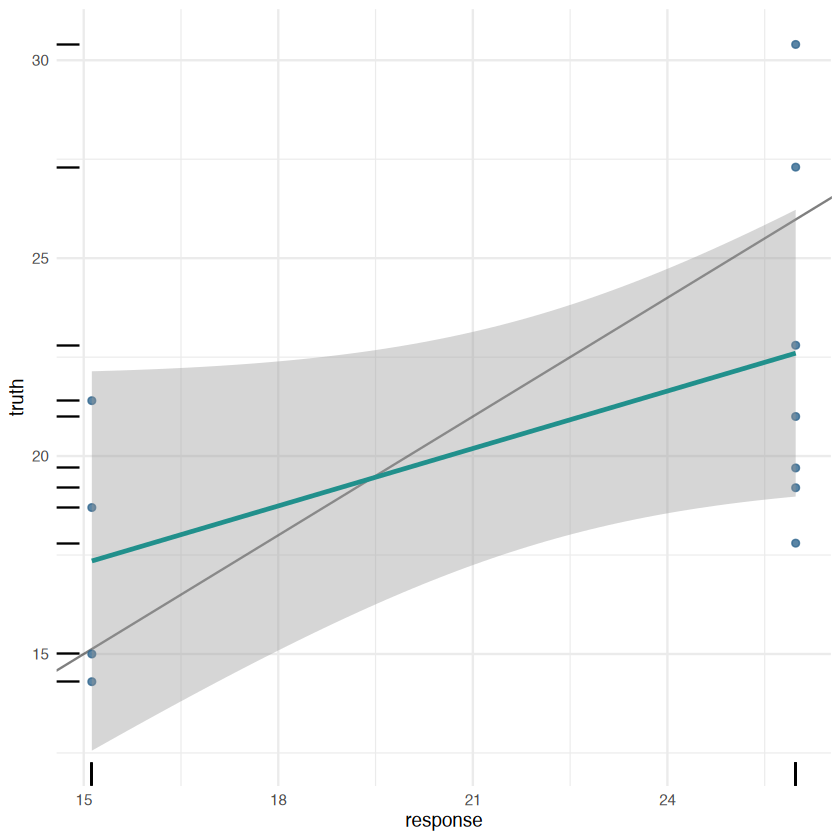

In [ ]:
library(mlr3viz)
prediction <- lrn_rpart$predict(tsk_mtcars, splits$test)
autoplot(prediction)

In [ ]:
mtcars_new <- data.table(
  cyl = c(5, 6),
  disp = c(100, 120),
  hp = c(100, 150),
  drat = c(4, 3.9),
  wt = c(3.8, 4.1),
  qsec = c(18, 19.5),
  vs = c(1, 0),
  am = c(1, 1),
  gear = c(6, 4),
  carb = c(3, 5)
)

prediction <- lrn_rpart$predict_newdata(mtcars_new)
prediction

# <PredictionRegr> for 2 observations:
#  row_ids truth response
#        1    NA 25.97778
#        2    NA 25.97778

<PredictionRegr> for 2 observations:
 row_ids truth response
       1    NA 25.97778
       2    NA 25.97778

## 更改预测类型

In [ ]:
library(mlr3learners)
lrn_lm <- lrn("regr.lm", predict_type = "se")
lrn_lm$train(tsk_mtcars, splits$train)
lrn_lm$predict(tsk_mtcars, splits$test)

# <PredictionRegr> for 11 observations:
#  row_ids truth  response       se
#        1  21.0 18.385337 2.846863
#        4  21.4 19.282261 1.838898
#        5  18.7 16.995092 1.682557
#      ---   ---       ---      ---
#       28  30.4 15.246709 4.767612
#       30  19.7  6.590408 6.315215
#       31  15.0 -3.600168 8.810161

<PredictionRegr> for 11 observations:
 row_ids truth  response       se
       1  21.0 18.385337 2.846863
       4  21.4 19.282261 1.838898
       5  18.7 16.995092 1.682557
     ---   ---       ---      ---
      28  30.4 15.246709 4.767612
      30  19.7  6.590408 6.315215
      31  15.0 -3.600168 8.810161

## 超参数

In [ ]:
lrn_rpart$param_set

# <ParamSet(10)>
#                 id    class lower upper nlevels        default  value
#             <char>   <char> <num> <num>   <num>         <list> <list>
#  1:             cp ParamDbl     0     1     Inf           0.01 [NULL]
#  2:     keep_model ParamLgl    NA    NA       2          FALSE [NULL]
#  3:     maxcompete ParamInt     0   Inf     Inf              4 [NULL]
#  4:       maxdepth ParamInt     1    30      30             30 [NULL]
#  5:   maxsurrogate ParamInt     0   Inf     Inf              5 [NULL]
#  6:      minbucket ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
#  7:       minsplit ParamInt     1   Inf     Inf             20 [NULL]
#  8: surrogatestyle ParamInt     0     1       2              0 [NULL]
#  9:   usesurrogate ParamInt     0     2       3              2 [NULL]
# 10:           xval ParamInt     0   Inf     Inf             10      0

<ParamSet(10)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
 1:             cp ParamDbl     0     1     Inf           0.01 [NULL]
 2:     keep_model ParamLgl    NA    NA       2          FALSE [NULL]
 3:     maxcompete ParamInt     0   Inf     Inf              4 [NULL]
 4:       maxdepth ParamInt     1    30      30             30 [NULL]
 5:   maxsurrogate ParamInt     0   Inf     Inf              5 [NULL]
 6:      minbucket ParamInt     1   Inf     Inf <NoDefault[0]> [NULL]
 7:       minsplit ParamInt     1   Inf     Inf             20 [NULL]
 8: surrogatestyle ParamInt     0     1       2              0 [NULL]
 9:   usesurrogate ParamInt     0     2       3              2 [NULL]
10:           xval ParamInt     0   Inf     Inf             10      0

In [54]:
lrn_rpart <- lrn("regr.rpart", maxdepth = 1)

In [ ]:
lrn_rpart$param_set$values

# $maxdepth
# 1
# $xval
# 0

$maxdepth
[1] 1

$xval
[1] 0

In [ ]:
lrn_rpart$train(tsk("mtcars"))$model

# n= 32 

# node), split, n, deviance, yval
#       * denotes terminal node

# 1) root 32 1126.0470 20.09062  
#   2) cyl>=5 21  198.4724 16.64762 *
#   3) cyl< 5 11  203.3855 26.66364 *

n= 32 

node), split, n, deviance, yval
      * denotes terminal node

1) root 32 1126.0470 20.09062  
  2) cyl>=5 21  198.4724 16.64762 *
  3) cyl< 5 11  203.3855 26.66364 *

In [ ]:
lrn_rpart$param_set$values$maxdepth <- 2
lrn_rpart$param_set$values

# $maxdepth
# 2
# $xval
# 0

$maxdepth
[1] 2

$xval
[1] 0

In [ ]:
# now with depth 2
lrn_rpart$train(tsk("mtcars"))$model

# n= 32 

# node), split, n, deviance, yval
#       * denotes terminal node

# 1) root 32 1126.04700 20.09062  
#   2) cyl>=5 21  198.47240 16.64762  
#     4) hp>=192.5 7   28.82857 13.41429 *
#     5) hp< 192.5 14   59.87214 18.26429 *
#   3) cyl< 5 11  203.38550 26.66364 *

n= 32 

node), split, n, deviance, yval
      * denotes terminal node

1) root 32 1126.04700 20.09062  
  2) cyl>=5 21  198.47240 16.64762  
    4) hp>=192.5 7   28.82857 13.41429 *
    5) hp< 192.5 14   59.87214 18.26429 *
  3) cyl< 5 11  203.38550 26.66364 *

In [ ]:
lrn_rpart = lrn("regr.rpart", maxdepth = 3, xval = 1)
lrn_rpart$param_set$values

# $maxdepth
# 3
# $xval
# 1

$maxdepth
[1] 3

$xval
[1] 1

In [ ]:
# or with set_values
lrn_rpart$param_set$set_values(xval = 2, cp = 0.5)
lrn_rpart$param_set$values

# $cp
# 0.5
# $maxdepth
# 3
# $xval
# 2

$cp
[1] 0.5

$maxdepth
[1] 3

$xval
[1] 2

In [ ]:
lrn("regr.svm")$param_set$deps %>% print()

# id     on                  cond
#     <char> <char>                <list>
# 1:   coef0 kernel <Condition:CondAnyOf>
# 2:    cost   type <Condition:CondAnyOf>
# 3:  degree kernel <Condition:CondEqual>
# 4: epsilon   type <Condition:CondEqual>
# 5:   gamma kernel <Condition:CondAnyOf>
# 6:      nu   type <Condition:CondEqual>

        id     on                  cond
    <char> <char>                <list>
1:   coef0 kernel <Condition:CondAnyOf>
2:    cost   type <Condition:CondAnyOf>
3:  degree kernel <Condition:CondEqual>
4: epsilon   type <Condition:CondEqual>
5:   gamma kernel <Condition:CondAnyOf>
6:      nu   type <Condition:CondEqual>


In [ ]:
# error as kernel is not polynomial
lrn("regr.svm", kernel = "linear", degree = 1)

# Error in self$assert(xs, sanitize = TRUE): Assertion on 'xs' failed: degree: can only be set if the following condition is met 'kernel == polynomial'. Instead the current parameter value is: kernel == linear.
# Traceback:

ERROR: Error in self$assert(xs, sanitize = TRUE): Assertion on 'xs' failed: degree: can only be set if the following condition is met 'kernel == polynomial'. Instead the current parameter value is: kernel == linear.


In [ ]:
# works because kernel is polynomial
lrn("regr.svm", kernel = "polynomial", degree = 1)

# <LearnerRegrSVM:regr.svm>: Support Vector Machine
# * Model: -
# * Parameters: degree=1, kernel=polynomial
# * Packages: mlr3, mlr3learners, e1071
# * Predict Types:  [response]
# * Feature Types: logical, integer, numeric
# * Properties: -

<LearnerRegrSVM:regr.svm>: Support Vector Machine
* Model: -
* Parameters: degree=1, kernel=polynomial
* Packages: mlr3, mlr3learners, e1071
* Predict Types:  [response]
* Feature Types: logical, integer, numeric
* Properties: -

## 基线学习器

In [72]:
# 生成数据
df <- as_task_regr(
  data.frame(x = runif(1000), y = rnorm(1000, 2, 1)),
  target = "y"
)
lrn("regr.featureless")$train(df, 1:995)$predict(df, 996:1000)

<PredictionRegr> for 5 observations:
 row_ids     truth response
     996 1.9611982 2.024236
     997 0.8726665 2.024236
     998 0.1886819 2.024236
     999 2.4489387 2.024236
    1000 0.7165547 2.024236

# 评估

In [74]:
lrn_rpart <- lrn("regr.rpart")
tsk_mtcars <- tsk("mtcars")
splits <- partition(tsk_mtcars)

# 训练模型
lrn_rpart$train(tsk_mtcars, splits$train)

# 预测
prediction <- lrn_rpart$predict(tsk_mtcars, splits$test)

## 测量指标

In [ ]:
msr()

# <DictionaryMeasure> with 75 stored values
# Keys: aic, bic, ci, ci.con_z, ci.cor_t, ci.holdout, ci.ncv, ci.wald_cv,
#   classif.acc, classif.auc, classif.bacc, classif.bbrier, classif.ce,
#   classif.costs, classif.dor, classif.fbeta, classif.fdr, classif.fn,
#   classif.fnr, classif.fomr, classif.fp, classif.fpr, classif.logloss,
#   classif.mauc_au1p, classif.mauc_au1u, classif.mauc_aunp,
#   classif.mauc_aunu, classif.mauc_mu, classif.mbrier, classif.mcc,
#   classif.npv, classif.ppv, classif.prauc, classif.precision,
#   classif.recall, classif.sensitivity, classif.specificity, classif.tn,
#   classif.tnr, classif.tp, classif.tpr, clust.ch, clust.dunn,
#   clust.silhouette, clust.wss, debug_classif, internal_valid_score,
#   oob_error, regr.bias, regr.ktau, regr.mae, regr.mape, regr.maxae,
#   regr.medae, regr.medse, regr.mse, regr.msle, regr.pbias,
#   regr.pinball, regr.rae, regr.rmse, regr.rmsle, regr.rrse, regr.rse,
#   regr.rsq, regr.sae, regr.smape, regr.srho, regr.sse,
#   selected_features, sim.jaccard, sim.phi, time_both, time_predict,
#   time_train

<DictionaryMeasure> with 75 stored values
Keys: aic, bic, ci, ci.con_z, ci.cor_t, ci.holdout, ci.ncv, ci.wald_cv,
  classif.acc, classif.auc, classif.bacc, classif.bbrier, classif.ce,
  classif.costs, classif.dor, classif.fbeta, classif.fdr, classif.fn,
  classif.fnr, classif.fomr, classif.fp, classif.fpr, classif.logloss,
  classif.mauc_au1p, classif.mauc_au1u, classif.mauc_aunp,
  classif.mauc_aunu, classif.mauc_mu, classif.mbrier, classif.mcc,
  classif.npv, classif.ppv, classif.prauc, classif.precision,
  classif.recall, classif.sensitivity, classif.specificity, classif.tn,
  classif.tnr, classif.tp, classif.tpr, clust.ch, clust.dunn,
  clust.silhouette, clust.wss, debug_classif, internal_valid_score,
  oob_error, regr.bias, regr.ktau, regr.mae, regr.mape, regr.maxae,
  regr.medae, regr.medse, regr.mse, regr.msle, regr.pbias,
  regr.pinball, regr.rae, regr.rmse, regr.rmsle, regr.rrse, regr.rse,
  regr.rsq, regr.sae, regr.smape, regr.srho, regr.sse,
  selected_features, sim.jaccard,

In [79]:
as.data.table(msr()) %>% head()

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustSil has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustSil.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.



key,label,task_type,packages,predict_type,properties,task_properties
<chr>,<chr>,<chr>,<list>,<chr>,<list>,<list>
aic,Akaike Information Criterion,NA,mlr3,NA,"na_score , requires_learner , requires_model , requires_no_prediction",
bic,Bayesian Information Criterion,NA,mlr3,NA,"na_score , requires_learner , requires_model , requires_no_prediction",
ci,Default CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
ci.con_z,Conservative-Z CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
ci.cor_t,Corrected-T CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,
ci.holdout,Holdout CI,NA,"mlr3 , mlr3measures, mlr3inferr",response,primary_iters,


In [ ]:
measure <- msr("regr.mae")
measure

# <MeasureRegrSimple:regr.mae>: Mean Absolute Error
# * Packages: mlr3, mlr3measures
# * Range: [0, Inf]
# * Minimize: TRUE
# * Average: macro
# * Parameters: list()
# * Properties: -
# * Predict type: response

<MeasureRegrSimple:regr.mae>: Mean Absolute Error
* Packages: mlr3, mlr3measures
* Range: [0, Inf]
* Minimize: TRUE
* Average: macro
* Parameters: list()
* Properties: -
* Predict type: response

## 预测得分

In [83]:
prediction

# <PredictionRegr> for 11 observations:
#  row_ids truth response
#        2  21.0 16.73333
#        4  21.4 16.73333
#        6  18.1 16.73333
#      ---   ---      ---
#       22  15.5 16.73333
#       29  15.8 16.73333
#       31  15.0 16.73333

<PredictionRegr> for 11 observations:
 row_ids truth response
       2  21.0 16.73333
       4  21.4 16.73333
       6  18.1 16.73333
     ---   ---      ---
      22  15.5 16.73333
      29  15.8 16.73333
      31  15.0 16.73333

In [ ]:
prediction$score(measure)

# regr.mae: 3.13030303030303

regr.mae 
3.130303

In [ ]:
measures <- msrs(c("regr.mse", "regr.mae"))
prediction$score(measures)

# regr.mse13.9318181818182 regr.mae3.13030303030303

regr.mse  regr.mae 
13.931818  3.130303

## 技术指标

In [ ]:
measures <- msrs(c("time_train", "time_predict", "time_both"))
prediction$score(measures, learner = lrn_rpart)

# time_train0.00200000000040745 time_predict0.000999999996565748 time_both0.0029999999969732

time_train time_predict    time_both 
       0.002        0.001        0.003

In [ ]:
msr_sf  <- msr("selected_features")
msr_sf

# <MeasureSelectedFeatures:selected_features>: Absolute or Relative Frequency of Selected Features
# * Packages: mlr3
# * Range: [0, Inf]
# * Minimize: TRUE
# * Average: macro
# * Parameters: normalize=FALSE
# * Properties: requires_task, requires_learner, requires_model,
#   requires_no_prediction
# * Predict type: NA

<MeasureSelectedFeatures:selected_features>: Absolute or Relative Frequency of Selected Features
* Packages: mlr3
* Range: [0, Inf]
* Minimize: TRUE
* Average: macro
* Parameters: normalize=FALSE
* Properties: requires_task, requires_learner, requires_model,
  requires_no_prediction
* Predict type: NA

In [ ]:
msr_sf <- msr("selected_features")
msr_sf$param_set

# <ParamSet(1)>
#           id    class lower upper nlevels        default  value
#       <char>   <char> <num> <num>   <num>         <list> <list>
# 1: normalize ParamLgl    NA    NA       2 <NoDefault[0]>  FALSE

<ParamSet(1)>
          id    class lower upper nlevels        default  value
      <char>   <char> <num> <num>   <num>         <list> <list>
1: normalize ParamLgl    NA    NA       2 <NoDefault[0]>  FALSE

In [ ]:
msr_sf$param_set$values$normalize <- TRUE
prediction$score(msr_sf, task = tsk_mtcars, learner = lrn_rpart)


# selected_features: 0.1

selected_features 
              0.1

# 测试回归

In [93]:
library(mlr3)
set.seed(123)

In [98]:
# 创建任务
tsk_mtcars <- tsk("mtcars")

# 划分数据集
splits <- partition(tsk_mtcars)

# 定义弱学习器
lrn_featureless <- lrn("regr.featureless")

# 定义树学习器
lrn_rpart <- lrn("regr.rpart")

# 定义评估指标为MSE与MAE
measures <- msrs(c("regr.mse", "regr.mae"))

# 训练模型
lrn_featureless$train(tsk_mtcars, splits$train)
lrn_rpart$train(tsk_mtcars, splits$train)

# 预测
pred_featureless <- lrn_featureless$predict(tsk_mtcars, splits$test)
pred_rpart <- lrn_rpart$predict(tsk_mtcars, splits$test)

In [ ]:
pred_featureless$score(measures)

# regr.mse 48.7093114821686
# regr.mae 5.50692640692641

regr.mse  regr.mae 
48.709311  5.506926

In [ ]:
pred_rpart$score(measures)

# regr.mse 20.8335241301908
# regr.mae 3.72020202020202

regr.mse  regr.mae 
20.833524  3.720202

# 分类

## 分类试验

In [101]:
library(mlr3)
set.seed(349)

# 创建任务
tsk_penguins <- tsk("penguins")

# 划分数据集
splits <- partition(tsk_penguins)

# 定义弱学习器
lrn_featureless <- lrn("classif.featureless")

# 定义树学习器
lrn_rpart <- lrn("classif.rpart")

# 定义评估指标为准确率
measures <- msrs(c("classif.acc"))

# 训练模型
lrn_featureless$train(tsk_penguins, splits$train)
lrn_rpart$train(tsk_penguins, splits$train)

# 预测
pred_featureless <- lrn_featureless$predict(tsk_penguins, splits$test)
pred_rpart <- lrn_rpart$predict(tsk_penguins, splits$test)

In [ ]:
pred_featureless$score(measures)

# classif.acc: 0.456140350877193

classif.acc 
  0.4561404

In [ ]:
pred_rpart$score(measures)

# classif.acc: 0.93859649122807

classif.acc 
  0.9385965

## 分类任务

In [107]:
as.data.table(mlr_tasks)[task_type == "classif"]

key,label,task_type,nrow,ncol,properties,lgl,int,dbl,chr,fct,ord,pxc,dte
<chr>,<chr>,<chr>,<int>,<int>,<list>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
breast_cancer,Wisconsin Breast Cancer,classif,683,10,twoclass,0,0,0,0,0,9,0,0
german_credit,German Credit,classif,1000,21,twoclass,0,3,0,0,14,3,0,0
ilpd,Indian Liver Patient Data,classif,583,11,twoclass,0,4,5,0,1,0,0,0
iris,Iris Flowers,classif,150,5,multiclass,0,0,4,0,0,0,0,0
optdigits,Optical Recognition of Handwritten Digits,classif,5620,65,twoclass,0,64,0,0,0,0,0,0
penguins,Palmer Penguins,classif,344,8,multiclass,0,3,2,0,2,0,0,0
penguins_simple,Simplified Palmer Penguins,classif,333,11,multiclass,0,3,7,0,0,0,0,0
pima,Pima Indian Diabetes,classif,768,9,twoclass,0,0,8,0,0,0,0,0
sonar,Sonar: Mines vs. Rocks,classif,208,61,twoclass,0,0,60,0,0,0,0,0


In [ ]:
as_task_classif(palmerpenguins::penguins, target = "species")

# <TaskClassif:palmerpenguins::penguins> (344 x 8)
# * Target: species
# * Properties: multiclass
# * Features (7):
#   - int (3): body_mass_g, flipper_length_mm, year
#   - dbl (2): bill_depth_mm, bill_length_mm
#   - fct (2): island, sex

<TaskClassif:palmerpenguins::penguins> (344 x 8)
* Target: species
* Properties: multiclass
* Features (7):
  - int (3): body_mass_g, flipper_length_mm, year
  - dbl (2): bill_depth_mm, bill_length_mm
  - fct (2): island, sex

In [ ]:
tsk_sonar <- tsk("sonar")
tsk_sonar

# <TaskClassif:sonar> (208 x 61): Sonar: Mines vs. Rocks
# * Target: Class
# * Properties: twoclass
# * Features (60):
#   - dbl (60): V1, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V2,
#     V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V3, V30, V31,
#     V32, V33, V34, V35, V36, V37, V38, V39, V4, V40, V41, V42, V43,
#     V44, V45, V46, V47, V48, V49, V5, V50, V51, V52, V53, V54, V55,
#     V56, V57, V58, V59, V6, V60, V7, V8, V9

<TaskClassif:sonar> (208 x 61): Sonar: Mines vs. Rocks
* Target: Class
* Properties: twoclass
* Features (60):
  - dbl (60): V1, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V2,
    V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V3, V30, V31,
    V32, V33, V34, V35, V36, V37, V38, V39, V4, V40, V41, V42, V43,
    V44, V45, V46, V47, V48, V49, V5, V50, V51, V52, V53, V54, V55,
    V56, V57, V58, V59, V6, V60, V7, V8, V9

In [ ]:
tsk_sonar$class_names

# 'M''R'

[1] "M" "R"

In [ ]:
tsk_penguins = tsk("penguins")
tsk_penguins$properties

# 'multiclass'

[1] "multiclass"

In [ ]:
tsk_penguins$class_names

# 'Adelie''Chinstrap''Gentoo'

[1] "Adelie"    "Chinstrap" "Gentoo"

In [ ]:
data(Sonar, package = "mlbench")

# 创建任务
tsk_classif <- as_task_classif(Sonar, target = "Class", positive = "R")

# 查看positive类
tsk_classif$positive

# 'R'

[1] "R"

In [ ]:
# 创建任务后修改属性
tsk_classif$positive <- "M"
tsk_classif$positive

# 'M'

[1] "M"

Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 11 rows containing non-finite outside the scale range
(`stat_g_gally_count()`)."


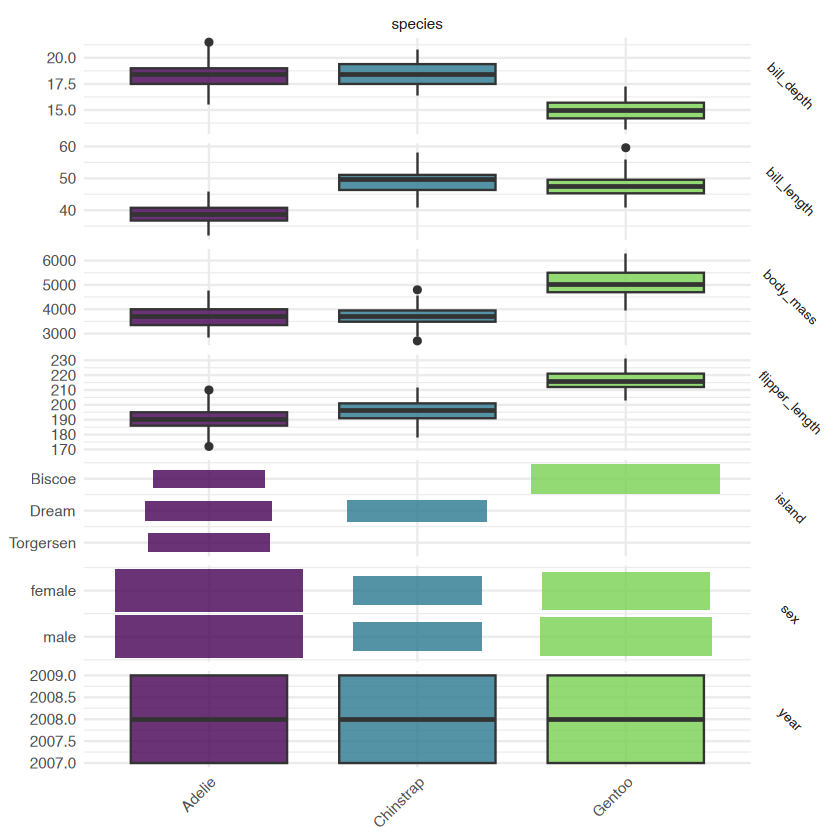

In [116]:
library(ggplot2)
autoplot(tsk("penguins"), type = "duo") +
  theme(strip.text.y = element_text(angle = -45, size = 8))

## 分类学习器与分类度量

In [ ]:
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")
lrn_rpart$train(tsk_penguins, splits$train)
prediction <- rn_rpart$predict(tsk_penguins, splits$test)
prediction

# <PredictionClassif> for 114 observations:
#  row_ids     truth  response prob.Adelie prob.Chinstrap prob.Gentoo
#        1    Adelie    Adelie  0.97029703     0.02970297   0.0000000
#        2    Adelie    Adelie  0.97029703     0.02970297   0.0000000
#        3    Adelie    Adelie  0.97029703     0.02970297   0.0000000
#      ---       ---       ---         ---            ---         ---
#      338 Chinstrap Chinstrap  0.04255319     0.93617021   0.0212766
#      339 Chinstrap Chinstrap  0.04255319     0.93617021   0.0212766
#      342 Chinstrap Chinstrap  0.04255319     0.93617021   0.0212766

<PredictionClassif> for 114 observations:
 row_ids     truth  response prob.Adelie prob.Chinstrap prob.Gentoo
       1    Adelie    Adelie  0.97029703     0.02970297   0.0000000
       2    Adelie    Adelie  0.97029703     0.02970297   0.0000000
       3    Adelie    Adelie  0.97029703     0.02970297   0.0000000
     ---       ---       ---         ---            ---         ---
     338 Chinstrap Chinstrap  0.04255319     0.93617021   0.0212766
     339 Chinstrap Chinstrap  0.04255319     0.93617021   0.0212766
     342 Chinstrap Chinstrap  0.04255319     0.93617021   0.0212766

In [118]:
as.data.table(msr())[
  task_type == "classif" &
    predict_type == "prob" &
    !sapply(task_properties, function(x) "twoclass" %in% x)
]

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustSil has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustSil.

Superclass MeasureClust has cloneable=FALSE, but subclass MeasureClustFPC has cloneable=TRUE. A subclass cannot be cloneable when its superclass is not cloneable, so cloning will be disabled for MeasureClustFPC.



key,label,task_type,packages,predict_type,properties,task_properties
<chr>,<chr>,<chr>,<list>,<chr>,<list>,<list>
classif.logloss,Log Loss,classif,"mlr3 , mlr3measures",prob,,
classif.mauc_au1p,Weighted average 1 vs. 1 multiclass AUC,classif,"mlr3 , mlr3measures",prob,,
classif.mauc_au1u,Average 1 vs. 1 multiclass AUC,classif,"mlr3 , mlr3measures",prob,,
classif.mauc_aunp,Weighted average 1 vs. rest multiclass AUC,classif,"mlr3 , mlr3measures",prob,,
classif.mauc_aunu,Average 1 vs. rest multiclass AUC,classif,"mlr3 , mlr3measures",prob,,
classif.mauc_mu,Multiclass mu AUC,classif,"mlr3 , mlr3measures",prob,,
classif.mbrier,Multiclass Brier Score,classif,"mlr3 , mlr3measures",prob,,


In [ ]:
measures <- msrs(c("classif.mbrier", "classif.logloss", "classif.acc"))
prediction$score(measures)

# classif.mbrier 0.102899613594403
# classif.logloss 0.754807810861767
# classif.acc 0.93859649122807

classif.mbrier classif.logloss     classif.acc 
      0.1028996       0.7548078       0.9385965

## 混淆矩阵

In [ ]:
prediction$confusion

# truth
# response    Adelie Chinstrap Gentoo
#   Adelie        48         2      0
#   Chinstrap      4        14      1
#   Gentoo         0         0     45

           truth
response    Adelie Chinstrap Gentoo
  Adelie        48         2      0
  Chinstrap      4        14      1
  Gentoo         0         0     45

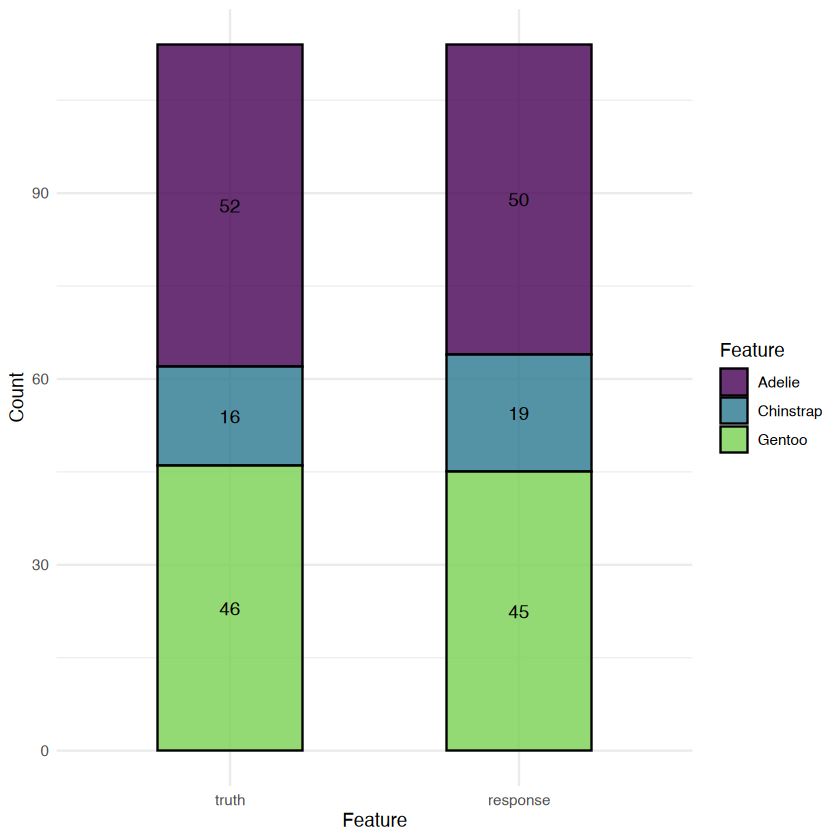

In [122]:
autoplot(prediction)

In [ ]:
splits <- partition(tsk_sonar)
lrn_rpart$
  train(tsk_sonar, splits$train)$
  predict(tsk_sonar, splits$test)$
  confusion

# truth
# response  M  R
#        M 16 13
#        R 13 27

        truth
response  M  R
       M 16 13
       R 13 27

## 设定阈值

In [ ]:
task_credit <- tsk("german_credit")
lrn_featureless <- lrn("classif.featureless", predict_type = "prob")
split <- partition(task_credit)

# 训练模型
lrn_featureless$train(task_credit, split$train)

# 预测
prediction <- lrn_featureless$predict(task_credit, split$test)

# 计算准确率
prediction$score(msr("classif.acc"))

# classif.acc: 0.693939393939394

classif.acc 
  0.6939394

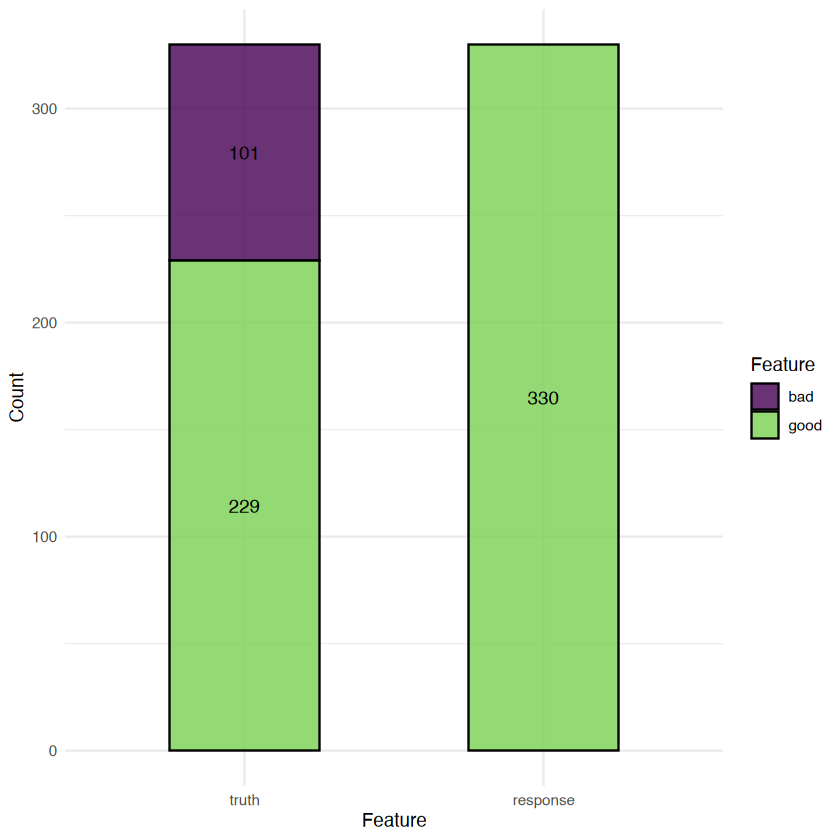

In [126]:
autoplot(prediction)

In [ ]:
prediction$set_threshold(0.7)
prediction$score(msr("classif.acc"))

# classif.acc: 0.693939393939394

classif.acc 
  0.6939394

In [ ]:
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")
lrn_rpart$train(task_credit, split$train)
prediction <- lrn_rpart$predict(task_credit, split$test)
prediction$score(msr("classif.acc"))

# classif.acc: 0.757575757575758

classif.acc 
  0.7575758

In [ ]:
prediction$confusion

#         truth
# response good bad
#     good  203  54
#     bad    26  47

        truth
response good bad
    good  203  54
    bad    26  47

In [ ]:
prediction$set_threshold(0.7)
prediction$score(msr("classif.acc"))

# classif.acc: 0.757575757575758

classif.acc 
  0.7575758

In [ ]:
prediction$confusion

# truth
# response good bad
#     good  202  53
#     bad    27  48

        truth
response good bad
    good  202  53
    bad    27  48

In [ ]:
# 定义概率向量
probs <- c(0.2, 0.4, 0.1, 0.3)
# 定义阈值向量，并命名
thresholds <- c(A = 1, B = 1, C = 1, D = 1)
# 逐元素相除
probs / thresholds

# A0.2B0.4C0.1D0.3

A   B   C   D 
0.2 0.4 0.1 0.3

In [ ]:
thresholds <- c(A = 0.5, B = 0.25, C = 0.25, D = 0.1)
probs / thresholds

# A0.4B1.6C0.4D3

A   B   C   D 
0.4 1.6 0.4 3.0

In [ ]:
library(ggplot2)
library(patchwork)

tsk_zoo <- tsk("zoo")
splits <- partition(tsk_zoo)
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")
lrn_rpart$train(tsk_zoo, splits$train)
prediction <- lrn_rpart$predict(tsk_zoo, splits$test)
before <- autoplot(prediction) + ggtitle("Default thresholds")
new_thresh <- proportions(table(tsk_zoo$truth(splits$test)))
new_thresh

# mammal          bird       reptile          fish     amphibian 
#    0.39393939    0.18181818    0.06060606    0.15151515    0.03030303 
#        insect mollusc.et.al 
#    0.06060606    0.12121212


       mammal          bird       reptile          fish     amphibian 
   0.39393939    0.18181818    0.06060606    0.15151515    0.03030303 
       insect mollusc.et.al 
   0.06060606    0.12121212 

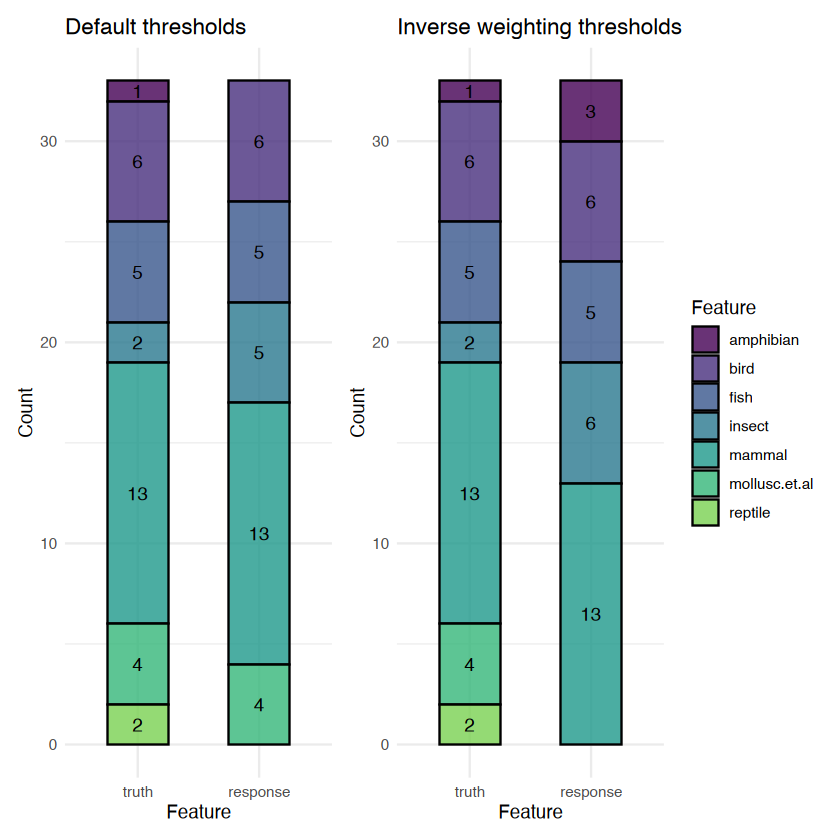

In [ ]:
prediction$set_threshold(new_thresh)
after <- utoplot(prediction) + ggtitle("Inverse weighting thresholds")
before + after + plot_layout(guides = "collect")

# 任务列角色

In [142]:
df <- data.frame(mtcars[1:2, ], idx = 2:1)
tsk_mtcars_order <- as_task_regr(df, target = "mpg")

tsk_mtcars_order$data(order = TRUE)

mpg,am,carb,cyl,disp,drat,gear,hp,idx,qsec,vs,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
21,1,4,6,160,3.9,4,110,2,16.46,0,2.620
21,1,4,6,160,3.9,4,110,1,17.02,0,2.875


In [150]:
# 使用idx列排序
tsk_mtcars_order$set_col_roles("idx", role = "order")
tsk_mtcars_order$data(order = TRUE)

mpg,am,carb,cyl,disp,drat,gear,hp,qsec,vs,wt
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,1,4,6,160,3.9,4,110,17.02,0,2.875
21,1,4,6,160,3.9,4,110,16.46,0,2.620


In [17]:
cancer_unweighted <- tsk("breast_cancer")
summary(cancer_unweighted$data()$class)

# malignant239 benign444

malignant    benign 
      239       444

In [16]:
set.seed(357)

In [18]:
# 设置权重
df <- cancer_unweighted$data() %>%
  mutate(
    weight = ifelse(class == "malignant", 2, 1)
  )

# 创建任务
cancer_weighted <- as_task_classif(df, target = "class")

# 设置权重列角色
cancer_weighted$set_col_roles("weight", role = "weight")

# 分割数据集
split <- partition(cancer_unweighted)

# 设置学习器
lrn_rf <- lrn("classif.ranger")

In [19]:
# 未加权数据集
lrn_rf$train(cancer_unweighted, split$train)$
  predict(cancer_unweighted, split$test)$score()

# classif.ce: 0.0222222222222222

classif.ce 
      0.04

In [20]:
lrn_rf$train(cancer_weighted, split$train)$
  predict(cancer_weighted, split$test)$score()

# classif.ce: 0.0222222222222222

classif.ce 
0.03111111

# 练习

## 练习1

In [21]:
data(PimaIndiansDiabetes2, package = "mlbench")
df <- PimaIndiansDiabetes2
head(df)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,NA,33.6,0.627,50,pos
2,1,85,66,29,NA,26.6,0.351,31,neg
3,8,183,64,NA,NA,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,NA,NA,25.6,0.201,30,neg


In [22]:
# 创建任务，pos为正类
tsk_classif <- as_task_classif(df, target = "diabetes", positive = "pos")

# 分割数据集，80%训练集，20%测试集
splits <- partition(tsk_classif, ratio = 0.8)

# 创建学习器
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")

# 训练模型并预测
prediction <- lrn_rpart$train(tsk_classif, splits$train)$
  predict(tsk_classif, splits$test)

In [ ]:
# 使用错误率评价性能
measure <- msr("classif.ce")
prediction$score(measure)

# classif.ce: 0.207792207792208

classif.ce 
 0.2077922

In [25]:
df_no_na <- df %>% na.omit()
head(df_no_na)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
7,3,78,50,32,88,31.0,0.248,26,pos
9,2,197,70,45,543,30.5,0.158,53,pos
14,1,189,60,23,846,30.1,0.398,59,pos
15,5,166,72,19,175,25.8,0.587,51,pos


In [ ]:
# 创建任务，pos为正类
tsk_classif <- as_task_classif(df_no_na, target = "diabetes", positive = "pos")

# 分割数据集，80%训练集，20%测试集
splits <- partition(tsk_classif, ratio = 0.8)

# 创建学习器
lrn_rpart <- lrn("classif.rpart", predict_type = "prob")

# 训练模型并预测
prediction <- lrn_rpart$train(tsk_classif, splits$train)$
  predict(tsk_classif, splits$test)

# 使用错误率评价性能
measure <- msr("classif.ce")
prediction$score(measure)

# classif.ce: 0.17948717948718

classif.ce 
 0.1794872

## 练习2

In [ ]:
# 使用mlr3verse预测TPR， FPR，TNR，FNR
measures <- msrs(
  c("classif.tpr", "classif.fpr", "classif.tnr", "classif.fnr")
)

prediction$score(measures)

# classif.tpr 0.666666666666667
# classif.fpr 0.12280701754386
# classif.tnr 0.87719298245614
# classif.fnr 0.333333333333333

classif.tpr classif.fpr classif.tnr classif.fnr 
  0.6666667   0.1228070   0.8771930   0.3333333

In [41]:
split$test

[1]   3   4   9  10  12  13  14  16  17  20  21  23  28  29  38  39  41  48
 [19]  49  51  52  54  55  56  58  59  60  62  65  66  67  70  72  74  76  77
 [37]  78  79  84  90  91  99 103 104 106 108 111 120 121 123 125 134 136 137
 [55] 138 140 142 143 145 147 150 153 154 156 161 163 169 170 174 180 181 182
 [73] 185 189 193 196 197 202 212 214 215 216 218 225 230 233 236 237 244 245
 [91] 246 248 253 255 257 258 260 269 271 274 277 281 283 290 293 294 295 298
[109] 299 304 309 311 313 316 319 328 330 332 335 340 342 344 349 350 352 353
[127] 362 364 365 368 372 373 374 375 376 379 383 385 386 402 403 405 409 411
[145] 412 414 417 418 423 425 432 436 438 441 444 446 448 453 462 464 465 473
[163] 475 479 482 489 491 492 495 497 506 507 510 513 519 521 522 523 524 528
[181] 529 530 538 539 552 557 560 562 563 566 567 569 570 572 573 575 576 585
[199] 589 590 591 592 601 602 608 609 611 613 614 617 624 626 627 628 644 648
[217] 650 651 652 658 666 669 674 675 679

In [37]:
df_truth_predict <- tibble(
  truth = prediction$truth,
  response = prediction$response
)

head(df_truth_predict)

truth,response
<fct>,<fct>
pos,pos
pos,pos
neg,neg
neg,neg
pos,pos
neg,neg


In [44]:
df_truth_predict %>%
  mutate(
    # TP，真阳性，真实值为阳，预测值也为阳
    TP = ifelse(truth == "pos" & response == "pos", 1, 0),
    # TN，真阴性，真实值为阴，预测值也为阴
    TN = ifelse(truth == "neg" & response == "neg", 1, 0),
    # FP，假阳性，真实值为阴，预测值为阳
    FP = ifelse(truth == "neg" & response == "pos", 1, 0),
    # FN，假阴性，真实值为阳，预测值为阴
    FN = ifelse(truth == "pos" & response == "neg", 1, 0),
    # 逻辑检测列，检验总和是否为1
    check = TP + TN + FP + FN
  ) %>%
  summarise(
    # TPR = TP / (TP + FN)
    TPR = sum(TP) / (sum(TP) + sum(FN)),
    # FPR = FP / (FP + TN)
    FPR = sum(FP) / (sum(FP) + sum(TN)),
    # TNR = TN / (TN + FP)
    TNR = sum(TN) / (sum(TN) + sum(FP)),
    # FNR = FN / (TP + FN)
    FNR = sum(FN) / (sum(TP) + sum(FN)),
  )

TPR,FPR,TNR,FNR
<dbl>,<dbl>,<dbl>,<dbl>
0.6666667,0.122807,0.877193,0.3333333


# 练习3

In [54]:
prediction$set_threshold(0.1)
prediction$score(measures)  %>% as.data.frame()

,.
,<dbl>
classif.tpr,0.8571429
classif.fpr,0.4035088
classif.tnr,0.5964912
classif.fnr,0.1428571
